## MSCA 37014  Python for Analytics


### Boston Data Description

- The medv variable is the **target variable**.

- The Boston data frame has 506 rows and 13 columns.

- This data frame contains the following columns:

`crim`: per capita crime rate by town.

`zn`: proportion of residential land zoned for lots over 25,000 sq.ft.

`indus`: proportion of non-retail business acres per town.

`chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

`nox`: nitrogen oxides concentration (parts per 10 million).

`rm`: average number of rooms per dwelling.

`age`: proportion of owner-occupied units built prior to 1940.

`dis`: weighted mean of distances to five Boston employment centres.

`rad`: index of accessibility to radial highways.

`tax`: full-value property-tax rate per \$10,000.

`ptratio`: pupil-teacher ratio by town.

`lstat`: lower status of the population (percent).

`medv`: median value of owner-occupied homes in \$1000s.


#### Source

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

***
***

# Part 1 

## Section 1 - Exploratory Data Analysis and Data Visualization

### 1. Import Libraries and oad the data into the pandas data frame

In [146]:
# Student's Answer: 
import pandas as pd
import numpy as np

df = pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### 2. Review data dimension and data type for each feature

In [2]:
# Student's Answer: 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


(506, 13)

### 3. Identify the unique number of values of each feature in the dataset

In [3]:
# Student's Answer:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

### 4. Check for missing values

In [4]:
# Student's Answer: 
df.isnull().sum().sort_values(ascending = False)

MEDV       0
LSTAT      0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

### 5. Review the data summary statistics

In [5]:
# Student's Answer:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 6. Create a correlation table with all the numeric features

In [6]:
# Student's Answer: 
correlation_df = df.corr()
correlation_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


### 7. Plot a heatmap based on the correlation table from 7

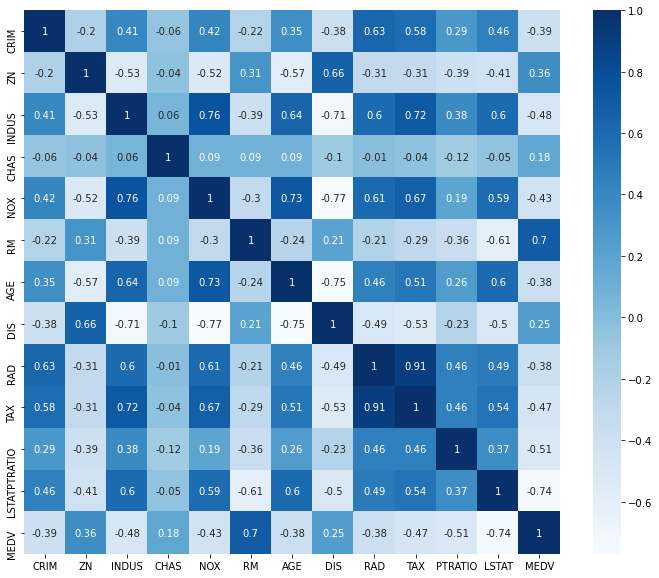

In [7]:
# Student's Answer: 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(correlation_df.round(2), annot=True, cmap=plt.cm.Blues)
plt.show()

### 8. Create some simple and quick plots with all the feature (hint: `pairplot()`)

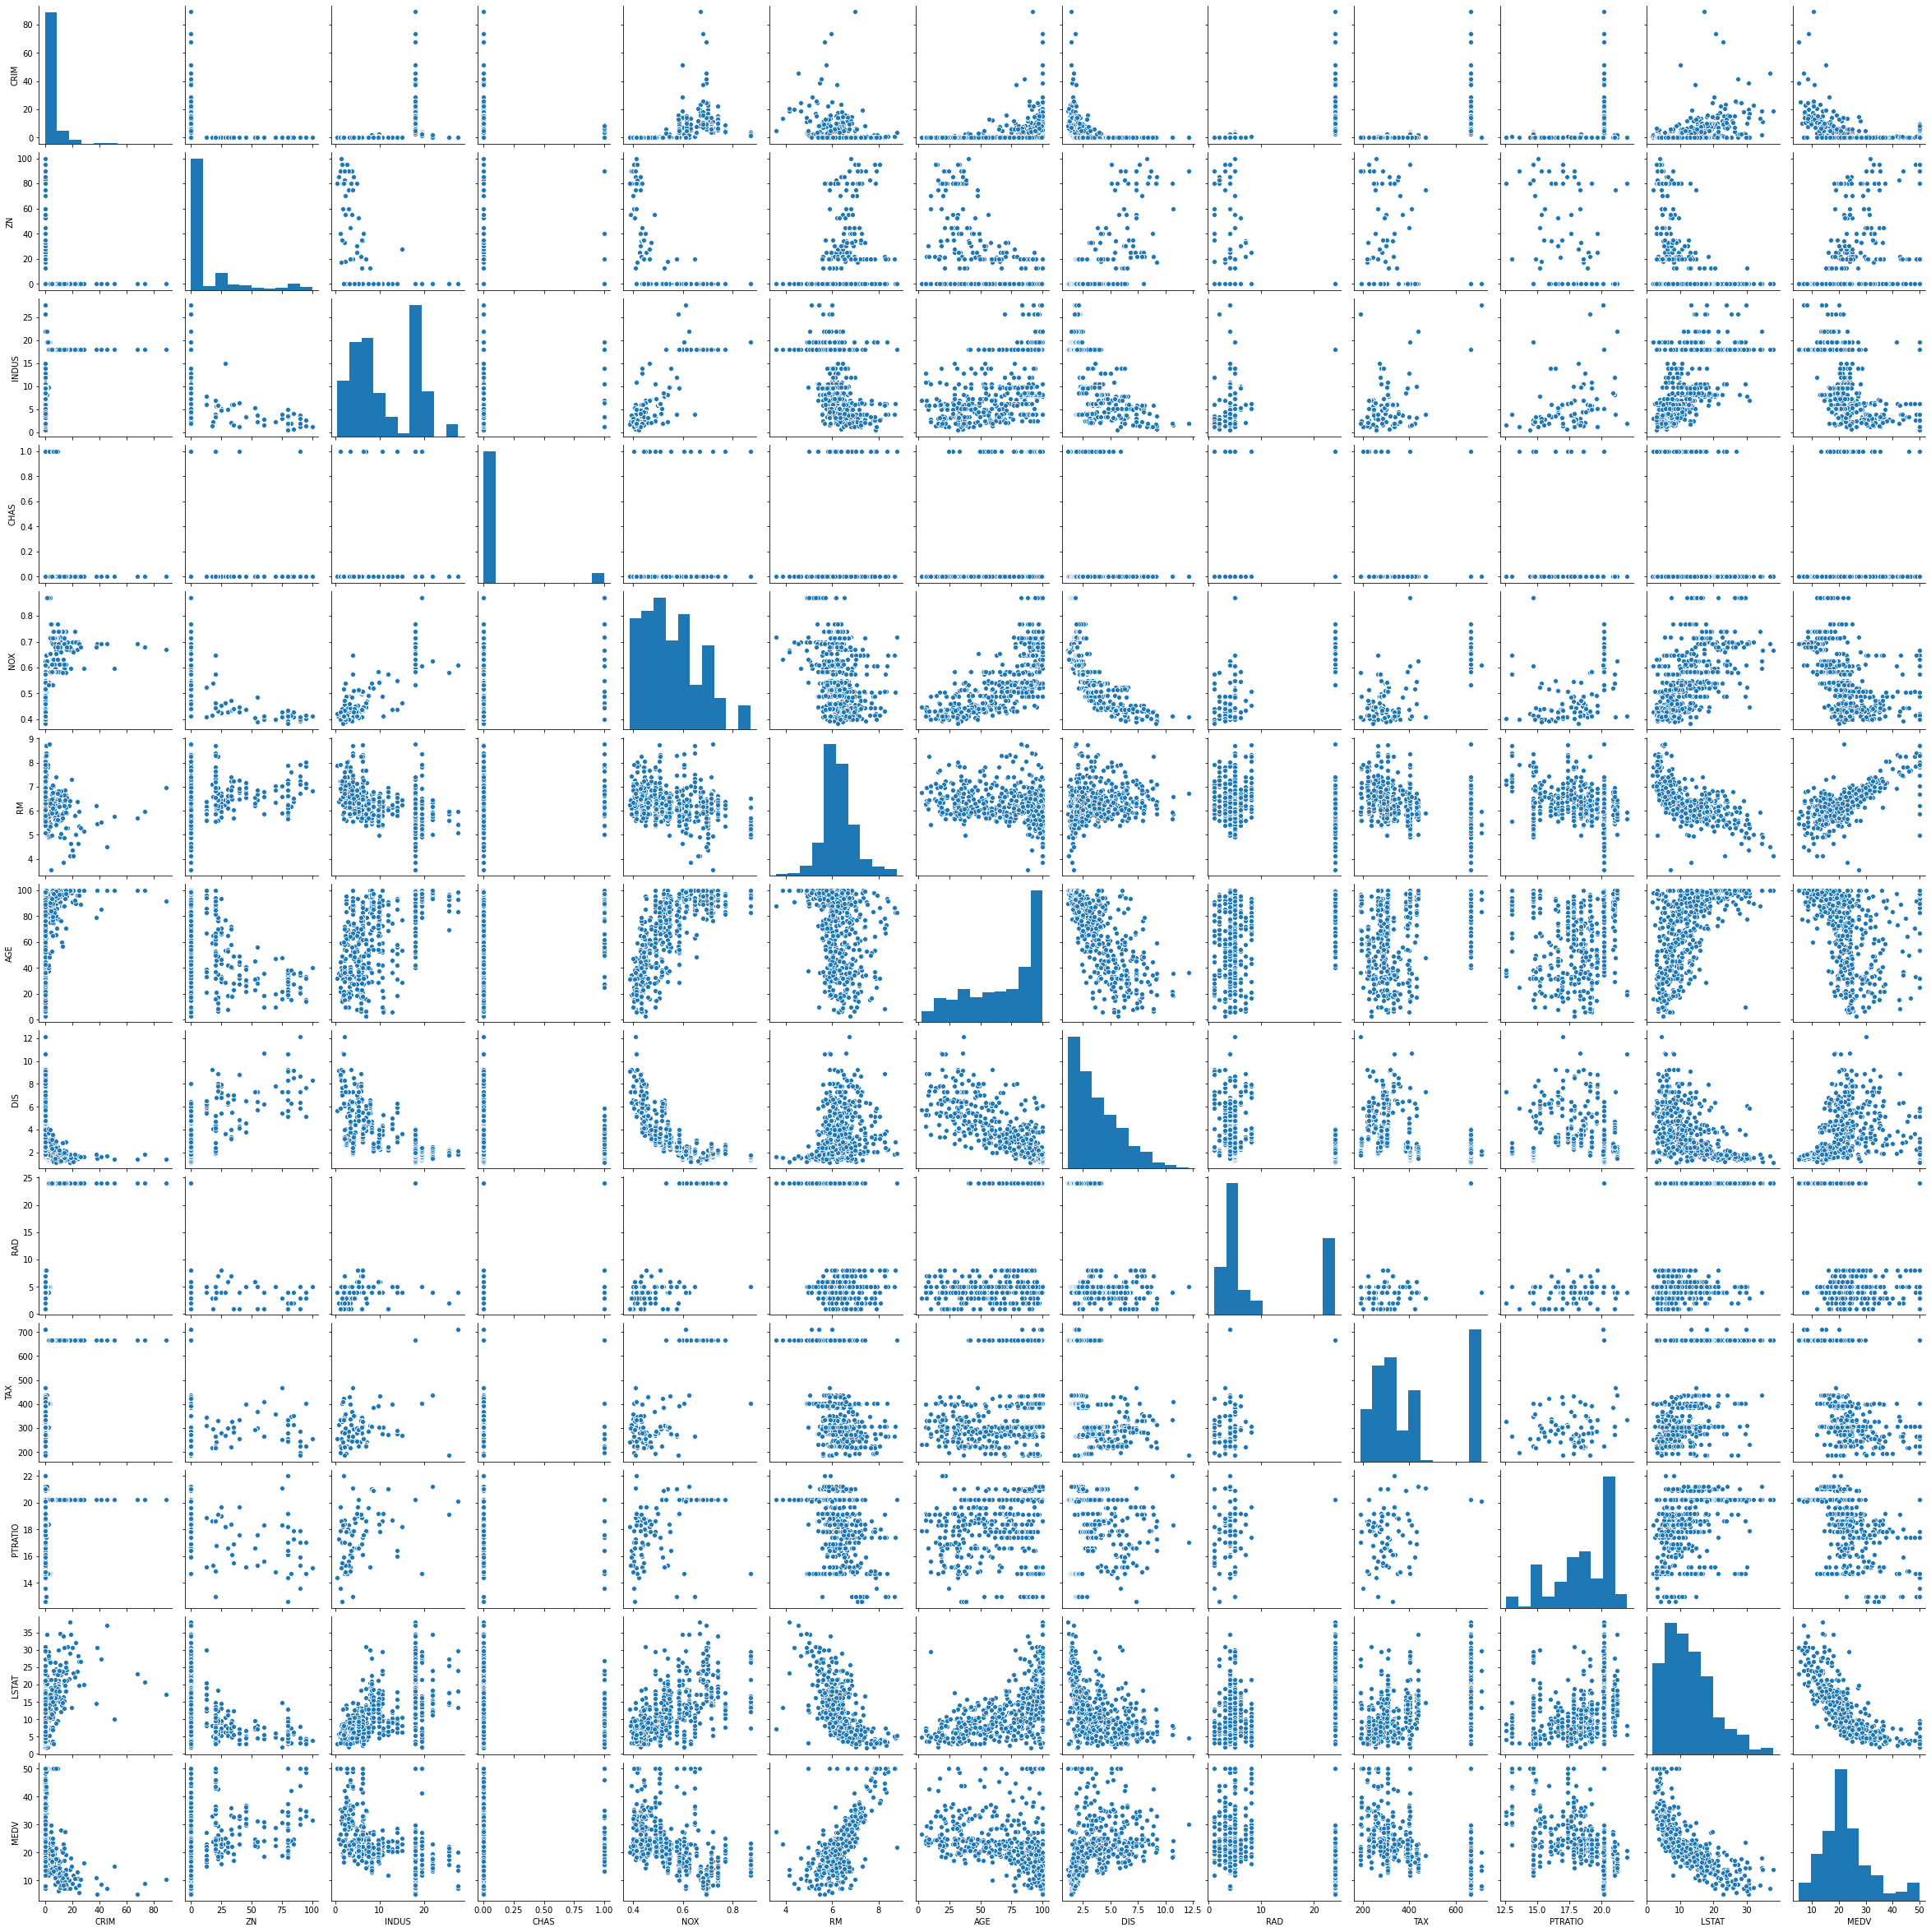

In [8]:
# Student's Answer:
sns.pairplot(df)

### 9. Create additional plots which could discover and support the key data findings for Part 1

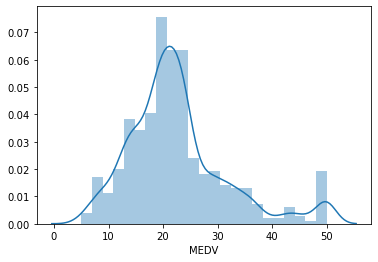

In [9]:
# Student's Answer: 
sns.distplot(df['MEDV'])

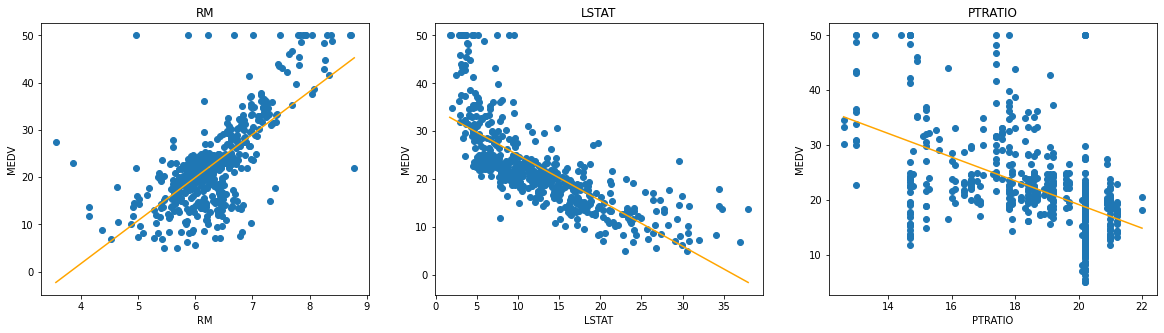

In [10]:
# Student's Answer: 
features = ['RM','LSTAT','PTRATIO']
prices = df['MEDV']

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = prices
    plt.scatter(x, y, marker='o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'orange')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 10. Make a Data Summary from Exploratory Data Analysis and Data Visualization
 
- 1) What are the features which are highly correlated to the target variable (MEDV)? (5 points)
- 2) What additional data insights you think are valuable to share.(5 bonus points)

In [11]:
# Student's Answer: 10.1
cor_target = abs(correlation_df["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [12]:
# Student's Answer: 10.2
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())
print(df[["RM","PTRATIO"]].corr())

print(df[["RM","MEDV"]].corr())
print(df[["LSTAT","MEDV"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000
               RM   PTRATIO
RM       1.000000 -0.355501
PTRATIO -0.355501  1.000000
           RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000
          LSTAT      MEDV
LSTAT  1.000000 -0.737663
MEDV  -0.737663  1.000000


RM and LSTAT are highly correlated with each other (-0.613808). Thus, we should keep only one feature as the input of the training model. Since MEDV has a higher correlation with LSTAT than with RM, we should keep LSTAT and drop RM.

## Section 2 - Simple Linear Regression (use the feature having the highest correlation coefficient with the target variable)
### 1. Split the dataset into X, y, Training set, and Test set (ony one feature in X)


In [147]:
# Student's Answer:
from sklearn.model_selection import train_test_split
X = df[['LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train the Simple Linear Regression model on the Training set


In [148]:
# Student's Answer:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### 3. Predict and visualize the test set results


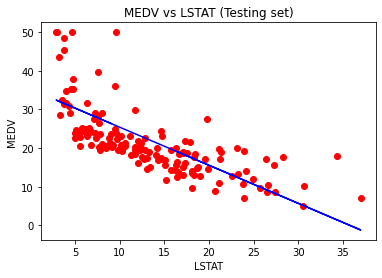

In [149]:
# Student's Answer:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lm.predict(X_test), color = 'blue')
plt.title('MEDV vs LSTAT (Testing set)')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### 4. Visualize the training set results 


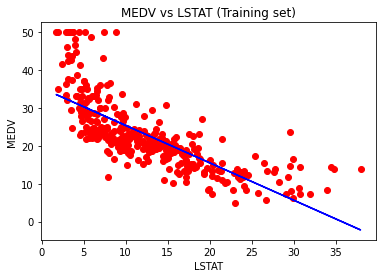

In [150]:
# Student's Answer:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('MEDV vs LSTAT (Training set)')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### 5. Make a single prediction 


In [151]:
# Student's Answer:
print(lm.predict([[20]]))

[15.54]


### 6. Get the final linear regression equation (with values of the coefficients) 

In [152]:
# Student's Answer:
print(lm.coef_)
print(lm.intercept_)

[-0.99]
35.26557743777449


Therefore, the equation of our linear regression equation is:

MEDV = 35.26 - 0.987*LSTAT

In [154]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = lm.predict(X_test)
r2_lr = r2_score(y_test, y_pred)
print(r2_lr)

mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)

0.4886979007906852
38.0987021824347


## Section 3 - Multiple Linear Regression 
### 1. Split the dataset into X, y, Training set, and Test set (more than one feature in X)

In [155]:
# Student's Answer:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2. Train the Multiple Linear Regression model on the Training set

In [156]:
# Student's Answer:
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression()


### 3. Predict the test set results

In [157]:
# Student's Answer:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[28.57 23.6 ]
 [36.82 32.4 ]
 [14.77 13.6 ]
 [25.41 22.8 ]
 [17.84 16.1 ]
 [23.16 20.  ]
 [17.16 17.8 ]
 [13.49 14.  ]
 [22.13 19.6 ]
 [20.28 16.8 ]
 [24.78 21.5 ]
 [18.31 18.9 ]
 [-4.85  7.  ]
 [21.62 21.2 ]
 [19.24 18.5 ]
 [25.35 29.8 ]
 [20.12 18.8 ]
 [ 4.58 10.2 ]
 [40.33 50.  ]
 [16.4  14.1 ]
 [27.42 25.2 ]
 [30.09 29.1 ]
 [11.08 12.7 ]
 [23.96 22.4 ]
 [17.91 14.2 ]
 [15.47 13.8 ]
 [22.94 20.3 ]
 [17.88 14.9 ]
 [22.49 21.7 ]
 [19.03 18.3 ]
 [22.06 23.1 ]
 [25.11 23.8 ]
 [24.04 15.  ]
 [17.87 20.8 ]
 [16.26 19.1 ]
 [18.45 19.4 ]
 [30.97 34.7 ]
 [20.17 19.5 ]
 [24.19 24.4 ]
 [24.95 23.4 ]
 [13.53 19.7 ]
 [31.76 28.2 ]
 [42.47 50.  ]
 [17.53 17.4 ]
 [27.08 22.6 ]
 [16.16 15.1 ]
 [14.07 13.1 ]
 [26.1  24.2 ]
 [19.27 19.9 ]
 [30.11 24.  ]
 [21.07 18.9 ]
 [34.11 35.4 ]
 [15.34 15.2 ]
 [25.96 26.5 ]
 [39.14 43.5 ]
 [22.11 21.2 ]
 [17.84 18.4 ]
 [33.1  28.5 ]
 [24.81 23.9 ]
 [12.77 18.5 ]
 [22.47 25.  ]
 [30.75 35.4 ]
 [31.65 31.5 ]
 [17.49 20.2 ]
 [21.35 24.1 ]
 [16.65 20.  ]
 [19.24 13

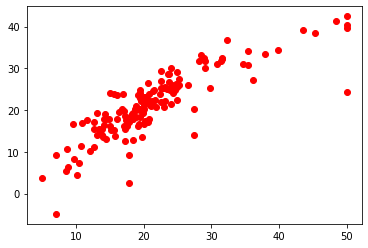

In [158]:
plt.scatter(y_test,y_pred, color='red')


### 4. Make a single prediction 

In [159]:
# Student's Answer:
print(lr.predict([[0.00632, 18, 2.31, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 4.98, 24]]))

[234.66]



### 5. Get the final linear regression equation (with values of the coefficients) 

In [160]:
# Student's Answer:
print(lr.coef_)

[-1.40e-01  3.61e-02  3.63e-02  3.46e+00 -1.60e+01  3.90e+00 -8.87e-03
 -1.39e+00  2.20e-01 -9.20e-03 -8.91e-01 -5.74e-01]


In [161]:
print(lr.intercept_)

37.57987443867438


Therefore, the equation of our multiple linear regression model is:

MEDV = 37.58 -0.14×CRIM + 0.036×ZN +0.036×INDUS +3.46×CHAS -16×NOX +3.9×RM -0.0087×AGE -1.39×DIS + 0.22×RAD -0.0092×TAX -0.89×PTRATIO -0.57×LSTAT

In [163]:
y_pred = lr.predict(X_test)
r2_mlr = r2_score(y_test, y_pred)
print(r2_mlr)

mse_mlr = mean_squared_error(y_test, y_pred)
print(mse_mlr)

0.716620944909778
21.11545061386957


***

# Part 2 

## Section 4 - Polynomial Linear Regression

### 1. Split the dataset into X, y, Training set, and Test set (exam and pick more than one feature or one strong feature in X based on the non-linear relationship with the target variable from data visualization) - similar as Section 3



In [74]:
relevant_features = cor_target[cor_target>0.4]
relevant_features

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [164]:
df_select = df[['LSTAT','RM','PTRATIO','INDUS','TAX','NOX','MEDV']]

In [165]:
X = df_select.iloc[:, :-1].values
y = df_select.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train the Polynomial Linear Regression model on the Training set


In [166]:
# Student's Answer:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()    
lin_reg.fit(X_train, y_train) 

from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree = 2)  
X_poly = poly_reg.fit_transform(X_train)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

LinearRegression()

### 3. Get the final linear regression equation (with values of the coefficients)

In [167]:
# Student's Answer:
print(lin_reg_poly.coef_)
print(lin_reg_poly.intercept_)

[ 8.68e-08 -9.83e-01  3.04e+01  9.74e+00 -3.78e-01 -8.53e-02  2.93e+02
  3.76e-02  4.14e-02  8.43e-03 -1.31e-02 -2.76e-03  2.35e-01  4.06e-01
 -9.65e-01  8.43e-02 -9.40e-03 -2.01e+01 -1.29e-01 -3.33e-02  7.58e-03
 -3.63e+00  5.53e-03  2.63e-04  8.00e-01  1.01e-06  4.62e-02 -1.12e+02]
-226.07517103545638


In [168]:
# Student's Answer:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-6.07e-01  4.61e+00 -8.50e-01  1.05e-01 -2.88e-03 -1.78e+00]
17.96178535650538


Therefore, the equation of our linear regression model is:

MEDV = 17.96 + -0.607×LSTAT + 4.607×RM -0.85×PTRATIO +0.105×INDUS -0.0029×TAX -1.78×NOX

In [169]:
y_pred = lin_reg.predict(X_test)
r2_lin_reg = r2_score(y_test, y_pred)
print(r2_lin_reg)

mse_lin_reg = mean_squared_error(y_test, y_pred)
print(mse_lin_reg)

0.6512910803690315
25.98338105383002


In [171]:
X_test_poly = poly_reg.fit_transform(X_test)
y_pred = lin_reg_poly.predict(X_test_poly)
r2_plr = r2_score(y_test, y_pred)
print(r2_plr)

mse_plr = mean_squared_error(y_test, y_pred)
print(mse_plr)

0.7913312255246542
15.548556334511138


## Section 5 - Decision Tree Regression

### 1. Split the dataset into X, y, Training set, and Test set (more than one feature in X) - same as Section 3

In [172]:
# Student's Answer:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train the Decision Tree Regression model on the Training set

In [173]:
# Student's Answer:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [174]:
y_pred = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred)
print(r2_dt)

mse_dt = mean_squared_error(y_test, y_pred)
print(mse_dt)

0.7242581129885607
20.54638157894737


## Section 6 - Random Forest Regression

### 1. Split the dataset into X, y, Training set, and Test set (more than one feature in X) - same as Section 3

In [175]:
# Student's Answer:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train the Random Forest Regression model on the Training set

In [176]:
# Student's Answer:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)  
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [177]:
y_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
print(r2_rf)

mse_rf = mean_squared_error(y_test, y_pred)
print(mse_rf)

0.8448212634544988
11.562848026315788


## Section 7 - Calculate R Square for all 5 Regression models to Select the Best model

- Any additional model evaluation metrics you think it would be good to use for all 5 Regression models (10 bonus points)

In [178]:
# Student's Answer:
print(r2_lr, r2_mlr, r2_lin_reg, r2_plr, r2_dt, r2_rf)
# another model evaluation metrics: mean squared error 
print(mse_lr, mse_mlr, mse_lin_reg, mse_plr, mse_dt, mse_rf)

0.4886979007906852 0.716620944909778 0.6512910803690315 0.7913312255246542 0.7242581129885607 0.8448212634544988
38.0987021824347 21.11545061386957 25.98338105383002 15.548556334511138 20.54638157894737 11.562848026315788
